In [1]:
import numpy as np
import streamlit as st
# import re
# import requests
# import base64
# from bs4 import BeautifulSoup
import datetime

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [2]:
crypto = ['SHIB-USD', 'BTC-USD', 'DOGE-USD', 'TRX-USD', 'USDT-USD', 'WRX-USD', 'BNB-USD', 'ETH-USD', 'LTC-BTC', 'XRP-USD', 'NEO-USD', 'EOS-USD', 'ZIL-INR', 'FTM-USD', 'CTSI-USD', 'MATIC-USD', 'IOTX-INR']


In [3]:
def fetch_data (start_date , end_date, tickers): 
    data = yf.download(tickers=tickers, start= start_date , end=end_date , interval = '1d')   
    return data

def get_pch(df):
    mean = df[op].mean()
    base_price = df.iloc[0][0]
    pch_list = []
    # pch_list.append(0)
    print("mean is " , mean)
    for i in range(len(df)):
        a= (df.iloc[i][0] - base_price)  / mean
        
        pch_list.append(a*100)
    # for i in range(1,len(df)):
    #     a= df.iloc[i][0]  / base_price
    #     if a > 1 :
    #         a= a -1 
    #     else:
    #         a = -(1 - a)
    #     pch_list.append(a*100)
    
    df = pd.DataFrame(pch_list)
    
    return df


In [4]:
import datetime
df1 = fetch_data(datetime.date(2011,1,1), datetime.date(2022,1,1),tickers=crypto[1])

df1.head()

op = 'Close'
days= 10

[*********************100%***********************]  1 of 1 completed


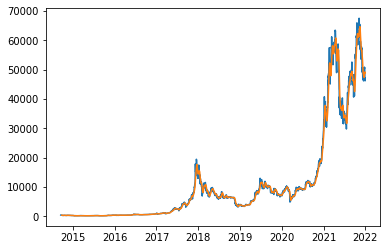

In [5]:
# Line_chart based on Rolling mean

df1[f'{op}-{days}d-rolling'] = df1[op].rolling(window=days).mean()
plt.plot(df1.loc[: ,[op, f'{op}-{days}d-rolling']])


In [6]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Close-10d-rolling
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN


In [7]:
df11 = get_pch(df1)    # 

df11.index = df1.index
df11.columns = ["Percentage change in "+op]
df11.head(10)



mean is  10760.231327046857


,Percentage change in Close
Date,
2014-09-17,0.000000
2014-09-18,-0.083679
2014-09-19,-0.388105
2014-09-20,-0.661612
2014-09-21,-0.536968
2014-09-22,-0.620470
2014-09-23,-0.592664
2014-09-24,-0.279855
2014-09-25,-0.396906


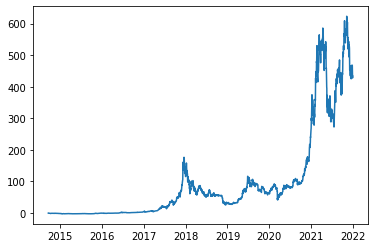

In [8]:
plt.plot(df11)

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series, autolag='AIC')
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [10]:
adf_test(df1[op])

ADF Statistics: -0.8987257336422633
p- value: 0.7883917622176029
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
## Use Techniques Differencing
df1[f'{op} First Difference']=df1[op]-df1[op].shift(1)

adf_test(df1[f'{op} First Difference'].dropna())

df1.head()

ADF Statistics: -8.381888333342152
p- value: 2.4972515792725457e-13
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


,Open,High,Low,Close,Adj Close,Volume,Close-10d-rolling,Close First Difference
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-32.894012
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-29.644012
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,14.108002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-10.082977


<AxesSubplot:xlabel='Date'>

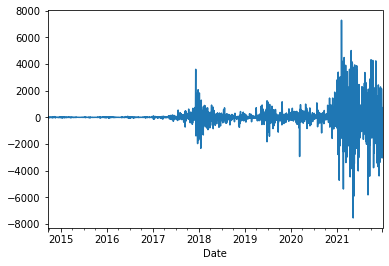

In [12]:
df1[f'{op} First Difference'].plot()

# Estimation Prediction

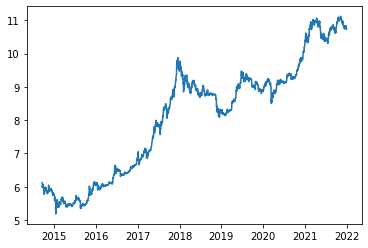

In [13]:
logscale_data = np.log(df1[f'{op}'].dropna())

plt.plot(logscale_data)

In [14]:
logscale_data.shape , logscale_data.dropna().shape

((2663,), (2663,))

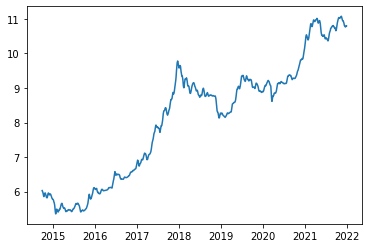

In [15]:
ma_log = logscale_data.rolling(window=10).mean() # moving average of logscale data

# df1[f'{op} First Difference'].plot()
plt.plot(ma_log)

In [16]:
df2 = logscale_data - ma_log
df2.dropna(inplace=True)
df2.head(15)

Date
2014-09-26   -0.027619
2014-09-27   -0.026306
2014-09-28   -0.072040
2014-09-29   -0.071575
2014-09-30   -0.035946
2014-10-01   -0.040699
2014-10-02   -0.056249
2014-10-03   -0.079378
2014-10-04   -0.143255
2014-10-05   -0.143984
2014-10-06   -0.094252
2014-10-07   -0.058657
2014-10-08   -0.003384
2014-10-09    0.033107
2014-10-10    0.030357
Name: Close, dtype: float64

In [17]:
adf_test(df2)

ADF Statistics: -11.778142216006419
p- value: 1.0504038880149145e-21
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


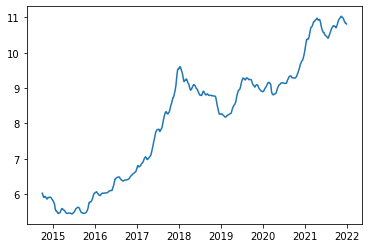

In [18]:
#  calculating weighted average

wa = logscale_data.ewm(halflife=10,min_periods=10).mean()

plt.plot(wa)

ADF Statistics: -7.639877135956602
p- value: 1.9084490360437083e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

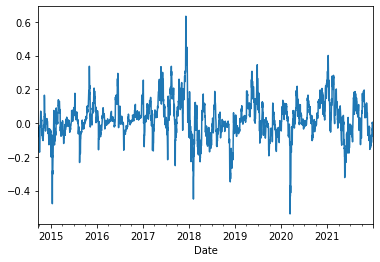

In [19]:
df3 =(logscale_data -wa).dropna()
adf_test(df3)
df3.plot()

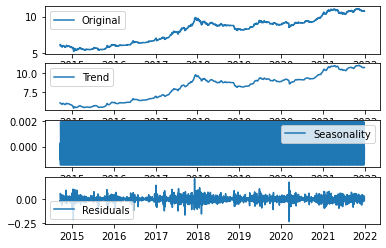

In [20]:
#  visulaizing the trend

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(logscale_data, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(logscale_data)
plt.legend(['Original'])
plt.subplot(412)
plt.plot(trend)
plt.legend(['Trend'])
plt.subplot(413)
plt.plot(seasonal)
plt.legend(['Seasonality'])
plt.subplot(414)
plt.plot(residual)
plt.legend(['Residuals'])


In [21]:
#  checking noise in date by using residuals

adf_test(residual.dropna())

ADF Statistics: -16.687515334336187
p- value: 1.498175671995985e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
#  PLotting PACF and ACF

from statsmodels.graphics.tsaplots import acf, pacf


C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

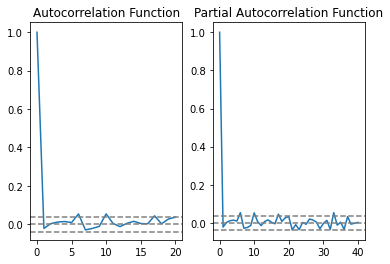

In [23]:
acf1 = acf((logscale_data - logscale_data.shift()).dropna() , nlags=20)
pacf1 = pacf((logscale_data - logscale_data.shift()).dropna() , method="ols")

plt.subplot(121)
plt.plot(acf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logscale_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(logscale_data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


plt.subplot(122)
plt.plot(pacf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logscale_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(logscale_data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')




In [24]:
p= 1
q=1
d =1

In [25]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# statsmodels.tsa.arima.model.ARIMA

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: nan')

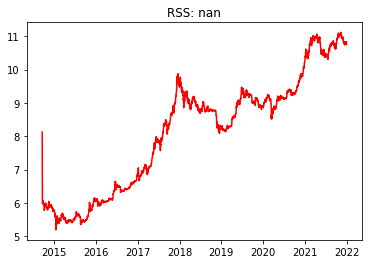

In [26]:
model = ARIMA(logscale_data, order=(1,0,1))

result = model.fit()
plt.plot(result.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result.fittedvalues-(logscale_data - logscale_data.shift()))**2))


In [27]:
result.fittedvalues

Date
2014-09-17     8.125713
2014-09-18     6.125637
2014-09-19     6.052563
2014-09-20     5.980156
2014-09-21     6.013007
                ...    
2021-12-27    10.835389
2021-12-28    10.832276
2021-12-29    10.771371
2021-12-30    10.746270
2021-12-31    10.761080
Length: 2663, dtype: float64

In [28]:
(logscale_data - logscale_data.shift())

Date
2014-09-17         NaN
2014-09-18   -0.074643
2014-09-19   -0.072402
2014-09-20    0.035111
2014-09-21   -0.024968
                ...   
2021-12-27   -0.003334
2021-12-28   -0.062151
2021-12-29   -0.024336
2021-12-30    0.015668
2021-12-31   -0.018649
Name: Close, Length: 2663, dtype: float64

In [29]:
pred = pd.Series(result.fittedvalues, copy=True)
pred

Date
2014-09-17     8.125713
2014-09-18     6.125637
2014-09-19     6.052563
2014-09-20     5.980156
2014-09-21     6.013007
                ...    
2021-12-27    10.835389
2021-12-28    10.832276
2021-12-29    10.771371
2021-12-30    10.746270
2021-12-31    10.761080
Length: 2663, dtype: float64

In [30]:
pred_cumsum = pred.cumsum()   # cumulative sum

pred_cumsum.head()

Date
2014-09-17     8.125713
2014-09-18    14.251350
2014-09-19    20.303913
2014-09-20    26.284069
2014-09-21    32.297076
dtype: float64

In [31]:
pred_log = pd.Series(logscale_data.iloc[0], index=logscale_data.index)
pred_log = pred_log.add(pred_cumsum,fill_value=0)
pred_log.head()



Date
2014-09-17    14.251127
2014-09-18    20.376764
2014-09-19    26.429327
2014-09-20    32.409483
2014-09-21    38.422490
dtype: float64

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


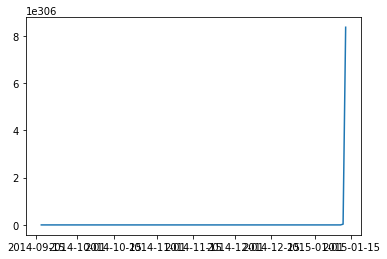

In [32]:
pred_arima = np.exp(pred_log)

plt.plot(pred_arima)

In [36]:
result.plot_predict(1,200, dynamic=False, plot_insample=False)

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [34]:
import statsmodels
statsmodels.__version__

'0.11.0'